# Generative approach to linear regression

## Install edward

In [ ]:
!pip install tensorflow==1.5.0
!pip install edward

## Generate artificial data set

In [2]:
import numpy as np

#y = ax + b
noise_std = 1.0
a = 4.0
b = -2.0
train_samples = 5000
test_samples = 1000

X_train = np.random.uniform(low = -5, high = 5, size = [train_samples, 1])
X_test = np.random.uniform(low = -5, high = 5, size = [test_samples, 1])

y_train = np.dot(X_train[:,0], a) + b + np.random.normal(0, noise_std, size=train_samples)
y_test = np.dot(X_test[:,0], a) + b

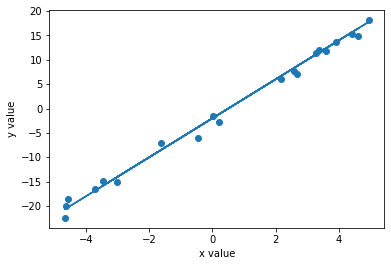

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:20,0], y_train[:20])
plt.plot(X_train[:20,0], np.dot(X_train[:20,0], a) + b)
plt.xlabel('x value')
plt.ylabel('y value')
plt.show()

## Define the generative model

In [5]:
import tensorflow as tf
import edward as ed
from edward.models import Normal

X = tf.placeholder(tf.float32, [train_samples, 1])
a = Normal(loc=tf.zeros(1), scale=tf.ones(1))
b = Normal(loc=tf.zeros(1), scale=tf.ones(1))
y = Normal(loc=ed.dot(X, a) + b, scale=tf.ones(train_samples))

## Variational inference

We define the variational model to be a fully factorized normal across the weights (qa and qb represent the posteriors of a and b respectively). 

In [6]:
qa = Normal(loc=tf.get_variable("qa/loc", [1]), scale=tf.nn.softplus(tf.get_variable("qa/scale", [1])))
qb = Normal(loc=tf.get_variable("qb/loc", [1]), scale=tf.nn.softplus(tf.get_variable("qb/scale", [1])))

Run variational inference with the Kullback-Leibler divergence.

In [ ]:
inference = ed.KLqp({a: qa, b: qb}, data={X: X_train, y: y_train})
inference.run(n_iter=2000)

Print out the estimated parameters.

In [16]:
print ("Estimated a: {}, estimated b: {}".format(qa.parameters['loc'].eval(), qb.parameters['loc'].eval()))

Estimated a: [4.0004325], estimated b: [-2.0328958]
